# tf2基于cnn实现mnist分类

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2954 - acc: 0.9146 - val_loss: 0.1397 - val_acc: 0.9606
Epoch 2/5
60000/60000 [==============================] - 4

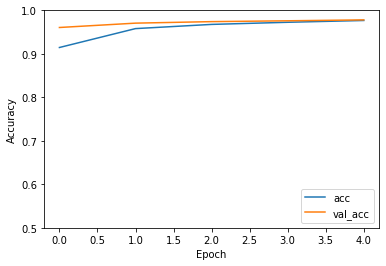

In [37]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images,
                               test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 特征缩放[0, 1]区间
train_images, test_images = train_images / 255.0, test_images / 255.0

# 创建卷积基
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()  # 显示模型的架构

# 在顶部添加密集层
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()  # 显示模型的架构

# 编译和训练模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)


(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


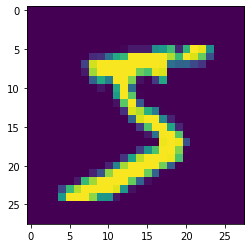

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()


In [3]:

x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))


In [5]:
#构造网络
model = models.Sequential()

In [6]:
#卷积层
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                        filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',
                       activation='relu'))

In [7]:
#池化层
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [8]:
#全连接层
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
# 分类层
model.add(layers.Dense(10, activation='softmax'))

In [10]:
#模型配置

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [11]:
#模型训练
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 17s 317us/sample - loss: 0.6185 - accuracy: 0.8394 - val_loss: 0.1506 - val_accuracy: 0.9600
Epoch 2/5
54000/54000 [==============================] - 18s 328us/sample - loss: 0.1230 - accuracy: 0.9655 - val_loss: 0.1053 - val_accuracy: 0.9738
Epoch 3/5
54000/54000 [==============================] - 19s 350us/sample - loss: 0.0768 - accuracy: 0.9768 - val_loss: 0.0851 - val_accuracy: 0.9780
Epoch 4/5
54000/54000 [==============================] - 18s 329us/sample - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.0755 - val_accuracy: 0.9808
Epoch 5/5
54000/54000 [==============================] - 17s 312us/sample - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0892 - val_accuracy: 0.9803


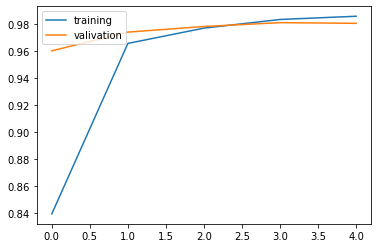

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()


In [15]:
test_loss, test_acc = model.evaluate(x_train, y_train)
print(test_acc)

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.98933333


# 手势识别10个手势

## 手势分类

### 图片按类别存放

In [54]:
import os
import shutil
path = 'D:/myworkspace/dataset/leapGestRecog/leapGestRecog/'
n=0
def modlist(path):
    label = 0 #标签
    #遍历根目录
    for i in os.listdir(path):#00~09个人
        file1 = os.path.join(path,i)
        for j in os.listdir(file1):##01-10个手势
            label=label+1
            file2 = os.path.join(file1,j)
            print("[INFO]file：%s %s"% (file2,j))
            for k in os.listdir(file2):
                img_name = os.path.join(file2,k)
                path2 ='D:/myworkspace/dataset/leapGestRecog/orig_data/'+str(label)+'/'
                if not os.path.exists(path2):
                    os.makedirs(path2)
                shutil.move( img_name , path2+str(k))
        print("[INFO]One Person Finished：",file2)
        label = 0
    print("[INFO]All Finished!")


modlist(path)
# data_x=np.array(data_x)
# data_y=np.array(data_y)
# print(data_x)
# print(data_y)
# print(data_x.shape,data_y.shape)



[INFO]file：D:/myworkspace/dataset/leapGestRecog/leapGestRecog/00\01_palm 01_palm
[INFO]file：D:/myworkspace/dataset/leapGestRecog/leapGestRecog/00\02_l 02_l
[INFO]file：D:/myworkspace/dataset/leapGestRecog/leapGestRecog/00\03_fist 03_fist
[INFO]file：D:/myworkspace/dataset/leapGestRecog/leapGestRecog/00\04_fist_moved 04_fist_moved
[INFO]file：D:/myworkspace/dataset/leapGestRecog/leapGestRecog/00\05_thumb 05_thumb
[INFO]file：D:/myworkspace/dataset/leapGestRecog/leapGestRecog/00\06_index 06_index
[INFO]file：D:/myworkspace/dataset/leapGestRecog/leapGestRecog/00\07_ok 07_ok
[INFO]file：D:/myworkspace/dataset/leapGestRecog/leapGestRecog/00\08_palm_moved 08_palm_moved
[INFO]file：D:/myworkspace/dataset/leapGestRecog/leapGestRecog/00\09_c 09_c
[INFO]file：D:/myworkspace/dataset/leapGestRecog/leapGestRecog/00\10_down 10_down
[INFO]One Person Finished： D:/myworkspace/dataset/leapGestRecog/leapGestRecog/00\10_down
[INFO]file：D:/myworkspace/dataset/leapGestRecog/leapGestRecog/01\01_palm 01_palm
[INFO]fi

### 图片大小调整

In [10]:
import os
from PIL import Image
#未处理图片位置
orig_picture = r'D:/myworkspace/dataset/leapGestRecog/orig_data/'

#已处理图片存储位置
gen_picture = r'D:/myworkspace/dataset/leapGestRecog/train_data/'
if not os.path.exists(gen_picture):
    os.makedirs(gen_picture)
    
#查询需要分类的类别以及总样本个数
classes = []
num_samples = 0

for str_classes in os.listdir(orig_picture):
    classes.append(str_classes)

#统一图片大小
def get_traindata(orig_dir,gen_dir,classes):
    i = 0
    for index,name in enumerate(classes):
        class_path = orig_dir + name + '/' #扫描原始图片
        gen_train_path = gen_dir + name   #判断是否有文件夹
        folder = os.path.exists(gen_train_path)
        if not folder :
            os.makedirs(gen_train_path)
            print(gen_train_path,'new file')
        else:
            print('There is this flie')
        #给图片加编号保存
        for imagename_dir in os.listdir(class_path):
            i += 1
            origimage_path = class_path + imagename_dir
            #统一格式
            image_data = Image.open(origimage_path).convert('RGB')
            image_data = image_data.resize((64,64))
            image_data.save(gen_train_path + '/'+str(index) + name + str(i) + '.png' )
            num_samples = i
    print('picture ：%d' % num_samples)

if __name__ == '__main__':
    get_traindata(orig_picture,gen_picture,classes)

D:/myworkspace/dataset/leapGestRecog/train_data/1 new file
D:/myworkspace/dataset/leapGestRecog/train_data/10 new file
D:/myworkspace/dataset/leapGestRecog/train_data/2 new file
D:/myworkspace/dataset/leapGestRecog/train_data/3 new file
D:/myworkspace/dataset/leapGestRecog/train_data/4 new file
D:/myworkspace/dataset/leapGestRecog/train_data/5 new file
D:/myworkspace/dataset/leapGestRecog/train_data/6 new file
D:/myworkspace/dataset/leapGestRecog/train_data/7 new file
D:/myworkspace/dataset/leapGestRecog/train_data/8 new file
D:/myworkspace/dataset/leapGestRecog/train_data/9 new file
picturn ：20000


### 图片分类 

In [58]:
import os
import shutil
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'D:/myworkspace/dataset/leapGestRecog/orig_data/'

# The directory where we will
# store our smaller dataset
base_dir = 'D:/myworkspace/dataset/CNN/train_data/'

if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

for num in os.listdir(original_dataset_dir):  # 1~10
    # 文件夹1~10
    train_idx_dir = os.path.join(train_dir, num)
    if not os.path.exists(train_idx_dir):
        os.mkdir(train_idx_dir)
    validation_idx_dir = os.path.join(validation_dir, num)
    if not os.path.exists(validation_idx_dir):
        os.mkdir(validation_idx_dir)
    test_idx_dir = os.path.join(test_dir, num)
    if not os.path.exists(test_idx_dir):
        os.mkdir(test_idx_dir)
    #
    original_idx_dir = original_dataset_dir+'/'+num
    # print(original_idx_dir)
    j = 0
    for fname in os.listdir(original_idx_dir):  # 1有2000张
        if j < 1000:  # Copy next 1000 images to train_idx_dir
            src = os.path.join(original_idx_dir, fname)
            dst = os.path.join(train_idx_dir, fname)
            shutil.copyfile(src, dst)
        elif (j >= 1000 and j < 1500):  # Copy next 500 images to validation_idx_dir
            src = os.path.join(original_idx_dir, fname)
            dst = os.path.join(validation_idx_dir, fname)
            shutil.copyfile(src, dst)
        elif (j >= 1500):  # Copy next 500 images to test_idx_dir
            src = os.path.join(original_idx_dir, fname)
            dst = os.path.join(test_idx_dir, fname)
            shutil.copyfile(src, dst)
        j = j+1
    print("[INFO]Copy finished! :", train_idx_dir)

print('[INFO]training files:', len(os.listdir(train_dir)))
print('[INFO]validation files:', len(os.listdir(validation_dir)))
print('[INFO]test files:', len(os.listdir(test_dir)))

print('[INFO]1 training images:', len(os.listdir(train_dir+"/1/")))
print('[INFO]1 validation images:', len(os.listdir(validation_dir+"/1/")))
print('[INFO]1 test images:', len(os.listdir(test_dir+"/1/")))

[INFO]Copy finished! : D:/myworkspace/dataset/CNN/train_data/train\1
[INFO]Copy finished! : D:/myworkspace/dataset/CNN/train_data/train\10
[INFO]Copy finished! : D:/myworkspace/dataset/CNN/train_data/train\2
[INFO]Copy finished! : D:/myworkspace/dataset/CNN/train_data/train\3
[INFO]Copy finished! : D:/myworkspace/dataset/CNN/train_data/train\4
[INFO]Copy finished! : D:/myworkspace/dataset/CNN/train_data/train\5
[INFO]Copy finished! : D:/myworkspace/dataset/CNN/train_data/train\6
[INFO]Copy finished! : D:/myworkspace/dataset/CNN/train_data/train\7
[INFO]Copy finished! : D:/myworkspace/dataset/CNN/train_data/train\8
[INFO]Copy finished! : D:/myworkspace/dataset/CNN/train_data/train\9
[INFO]training files: 10
[INFO]validation files: 10
[INFO]test files: 10
[INFO]1 training images: 1000
[INFO]1 validation images: 500
[INFO]1 test images: 500


## 图像预处理

In [64]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(
                                                             150, 150),
                                                         batch_size=20,
                                                         class_mode='binary')
test_generator = train_datagen.flow_from_directory(test_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 10000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.


## 构建卷积神经网络

In [59]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [60]:
#模型配置
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

## 训练网络

In [65]:
for data_batch,label_batch in train_generator:
    print("data batch shape:",data_batch.shape)
    print("labels batch shape:",label_batch)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: [3. 7. 0. 6. 2. 5. 0. 0. 7. 0. 6. 8. 8. 5. 1. 9. 4. 7. 9. 7.]


In [87]:
#模型训练
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 87s 867ms/step - loss: -20867024742.4000 - acc: 0.1000 - val_loss: -20649594880.0000 - val_acc: 0.1070
Epoch 2/30
100/100 [==============================] - 85s 850ms/step - loss: -32659894804.4800 - acc: 0.1090 - val_loss: -47023828992.0000 - val_acc: 0.1140
Epoch 3/30
100/100 [==============================] - 82s 825ms/step - loss: -55324050350.0800 - acc: 0.1040 - val_loss: -71165411328.0000 - val_acc: 0.1040
Epoch 4/30
100/100 [==============================] - 78s 776ms/step - loss: -84325370183.6800 - acc: 0.0920 - val_loss: -131673661440.0000 - val_acc: 0.0860
Epoch 5/30
100/100 [==============================] - 79s 793ms/step - loss: -118450973818.8800 - acc: 0.0950 - val_loss: -111272632320.0000 - val_acc: 0.0890
Epoch 6/30
100/100 [==============================] - 47s 474ms/step - loss: -170315309137.9200 - acc: 0.1050 - val_loss: -175973384192.0000 - val_acc: 0.0820
Epoch 7/30
100/100 [==============================] -

In [ ]:
保存模型

In [69]:
model.save('D:/myworkspace/dataset/CNN/leapGestRecog_small_1.h5')

In [88]:
#30次
model.save('D:/myworkspace/dataset/CNN/leapGestRecog_small_2.h5')

## 模型评估

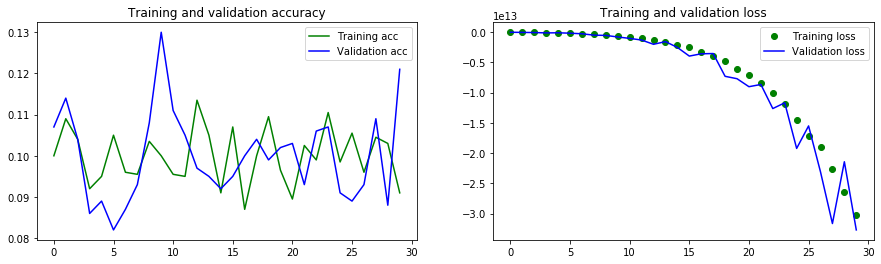

In [98]:
#结果可视化
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Training acc',color='green')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label='Training loss',color='green')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [99]:
from keras.models import load_model

model = load_model('D:/myworkspace/dataset/CNN/leapGestRecog_small_2.h5')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

(1, 150, 150, 3)


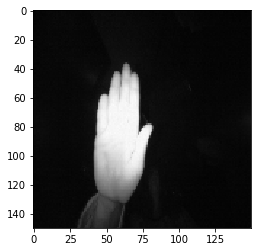

第一层网络结构大小： (1, 148, 148, 32)


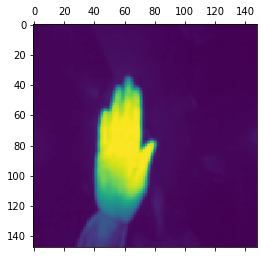

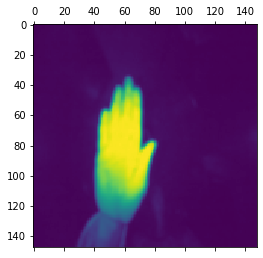

In [100]:
img_path = 'D:/myworkspace/dataset/CNN/train_data/test/1/frame_07_01_0105.png'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)


import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()


from keras import models

layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs=model.input,outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

first_layer_activation=activations[0]
print('第一层网络结构大小：',first_layer_activation.shape)

#第三个通道
plt.matshow(first_layer_activation[0,:,:,3],cmap="viridis")
plt.show()
#第10个通道
plt.matshow(first_layer_activation[0,:,:,30],cmap="viridis")
plt.show()